In [1]:
# Importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Printing Plots in Notebook
%matplotlib inline

# Ignoring warnings
warnings.filterwarnings('ignore')

In [2]:
# Datapath
DATA_SET_PATH = '/home/ashay/ASHAYKING/dataset/titanic'

In [6]:
data_raw = pd.read_csv( DATA_SET_PATH + '/train.csv')
data = data_raw.copy(deep = True)

data_val = pd.read_csv( DATA_SET_PATH + '/test.csv')

In [7]:
data_cleaner = [data, data_val]

In [11]:
print('Train columns with null values:\n', data.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [12]:
# Loading Data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* PassengerId will not be useful as it is incremental in nature
* We have Age, Fare as proper numerical feature
* Remaining feature are either categorical,boolean or textual in natural

In [13]:
data = data.drop(columns=['PassengerId','Ticket'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Now we have clear set of feature to go forward. lets start with exploring every feature w.r.t Target(Survived).

In [14]:
# Checking Null Values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [16]:
data[['Age','Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Survived

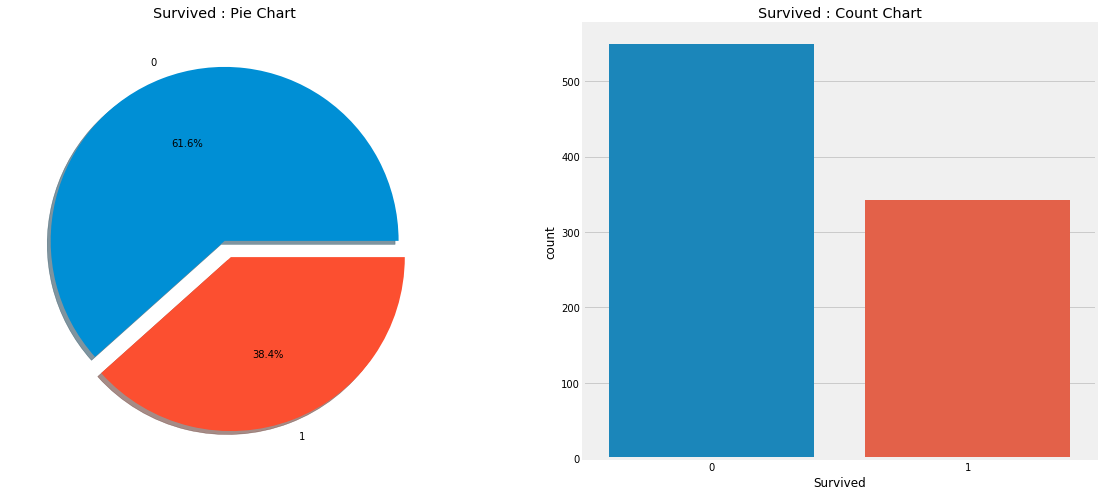

In [17]:
# We want to plot two chart. hence create f object with 2 sections
f, ax = plt.subplots(1,2,figsize=(18,8))

survived_ratio = data['Survived'].value_counts()
survived_ratio.plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived : Pie Chart')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived : Count Chart')

plt.show()

### Pclass

In [18]:
# Using crosstab we get count date with respect to Survived
pd.crosstab(data['Pclass'],data['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


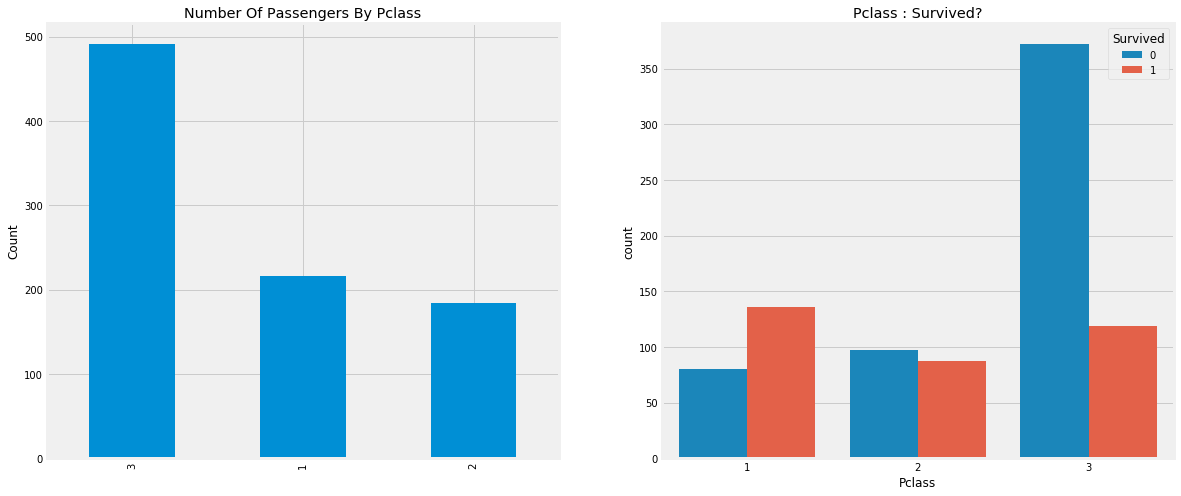

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))

pclass_ratio = data['Pclass'].value_counts()
pclass_ratio.plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass : Survived?')

plt.show()

### Sex

In [20]:
# Using crosstab we get count date with respect to Survived
pd.crosstab(data['Sex'],data['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


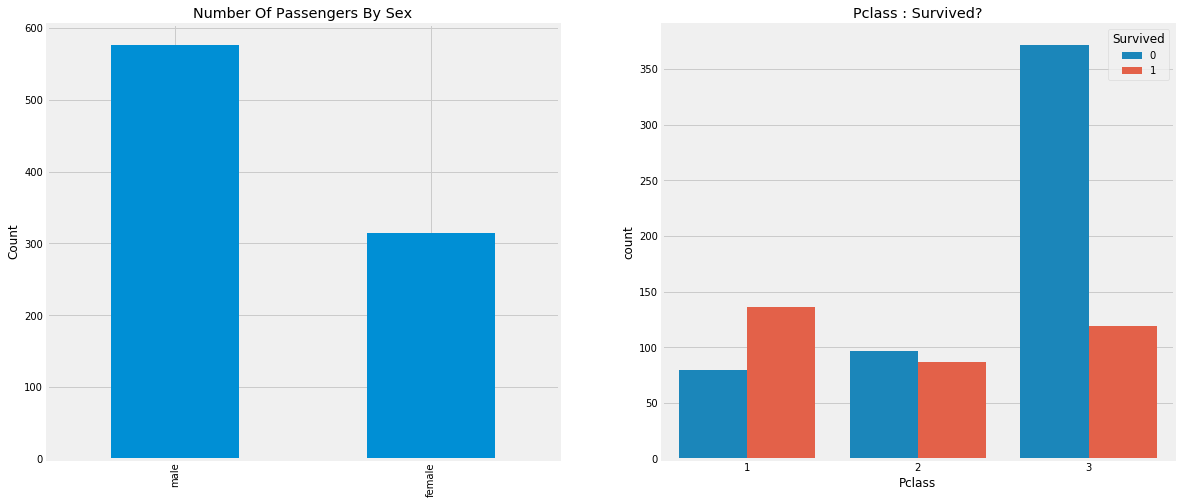

In [21]:
f, ax = plt.subplots(1,2,figsize=(18,8))

pclass_ratio = data['Sex'].value_counts()
pclass_ratio.plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass : Survived?')

plt.show()

In [22]:
# Just for fun
# Lets check Sex and Pclass relation
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

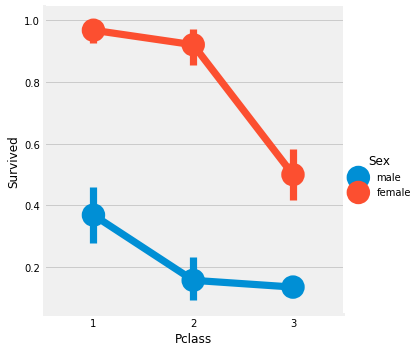

In [23]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### Name and Age

In [25]:
# Creating new feature using Name
data['Initial']=0
for i in data:
    data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.')

In [26]:
## Validatation set
data_val['Initial'] = 0
for i in data_val:
    data_val['Initial']=data_val['Name'].str.extract('([A-Za-z]+)\.')

In [27]:
pd.crosstab(data['Sex'],data['Initial']).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [28]:
# Looks like some of Initials are mispelled
data['Initial'].replace(
    ['Mlle','Mme','Ms','Lady','Countess','Jonkheer','Col','Rev','Dr','Major','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr','Mr'],
    inplace=True
)

data_val['Initial'].replace(
    ['Mlle','Mme','Ms','Lady','Countess','Jonkheer','Col','Rev','Dr','Major','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr','Mr'],
    inplace=True
)

In [29]:
data.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

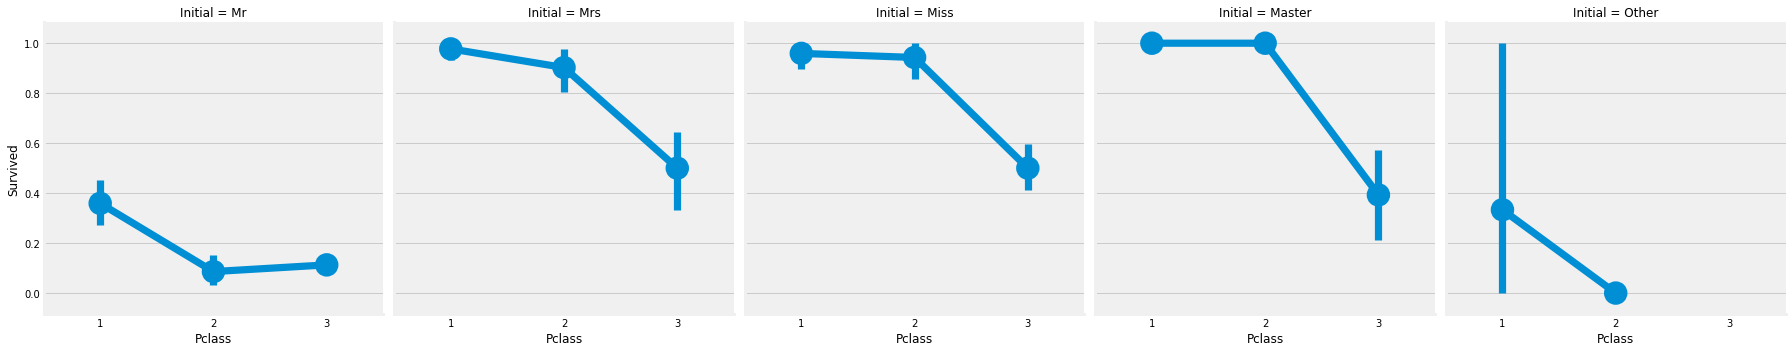

In [30]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [31]:
# Getting age by initials
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [32]:
# Fill Nan with above mean value
data.loc[(data['Age'].isnull()) & (data['Initial']=='Master'),'Age'] = 5;
data.loc[(data['Age'].isnull()) & (data['Initial']=='Miss'),'Age'] = 22;
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mr'),'Age'] = 33;
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mrs'),'Age'] = 35;
data.loc[(data['Age'].isnull()) & (data['Initial']=='Other'),'Age'] = 46;


## Validation set
data_val.loc[(data_val['Age'].isnull()) & (data_val['Initial']=='Master'),'Age'] = 5;
data_val.loc[(data_val['Age'].isnull()) & (data_val['Initial']=='Miss'),'Age'] = 22;
data_val.loc[(data_val['Age'].isnull()) & (data_val['Initial']=='Mr'),'Age'] = 33;
data_val.loc[(data_val['Age'].isnull()) & (data_val['Initial']=='Mrs'),'Age'] = 35;
data_val.loc[(data_val['Age'].isnull()) & (data_val['Initial']=='Other'),'Age'] = 46;

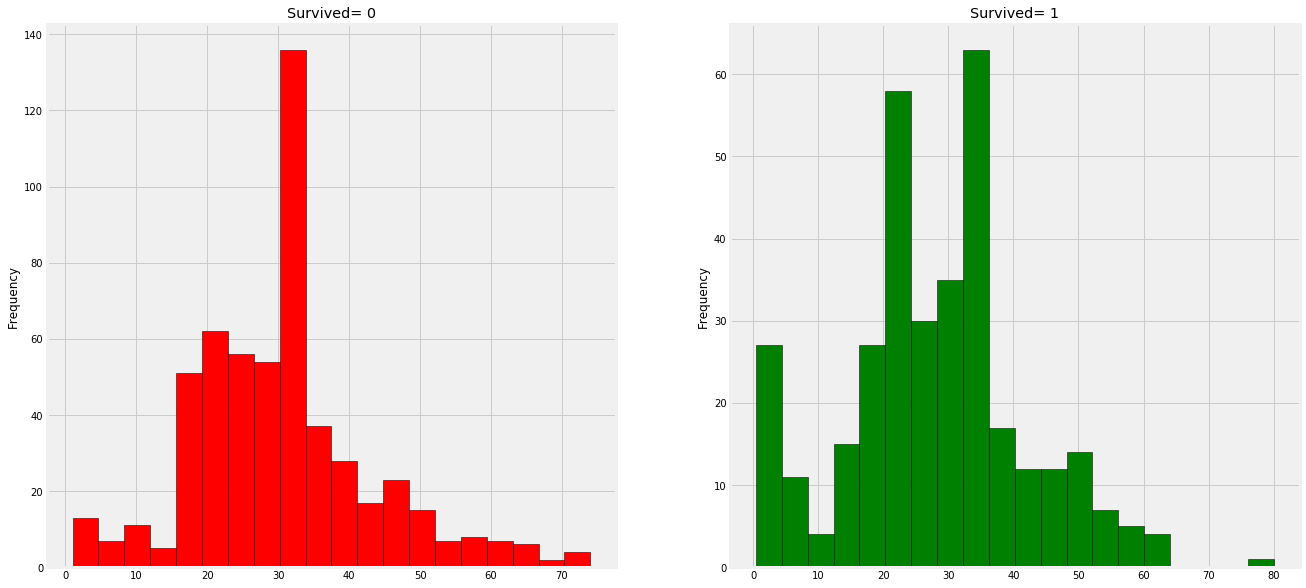

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))

data[data['Survived']==0]['Age'].plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
data[data['Survived']==1]['Age'].plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')

plt.show()

In [34]:
# Feature Engineering Age (continous feature) : Lets create five group for the feature which 
data['Age_band']=0
data.loc[data['Age']<16,'Age_band']=0;
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4


data_val['Age_band']=0
data_val.loc[data_val['Age']<16,'Age_band']=0;
data_val.loc[(data_val['Age']>16)&(data_val['Age']<=32),'Age_band']=1
data_val.loc[(data_val['Age']>32)&(data_val['Age']<=48),'Age_band']=2
data_val.loc[(data_val['Age']>48)&(data_val['Age']<=64),'Age_band']=3
data_val.loc[data_val['Age']>64,'Age_band']=4

In [35]:
data['Age_band'].value_counts().to_frame().T.style.background_gradient(cmap='summer')

,1,2,0,3,4
Age_band,382,325,104,69,11


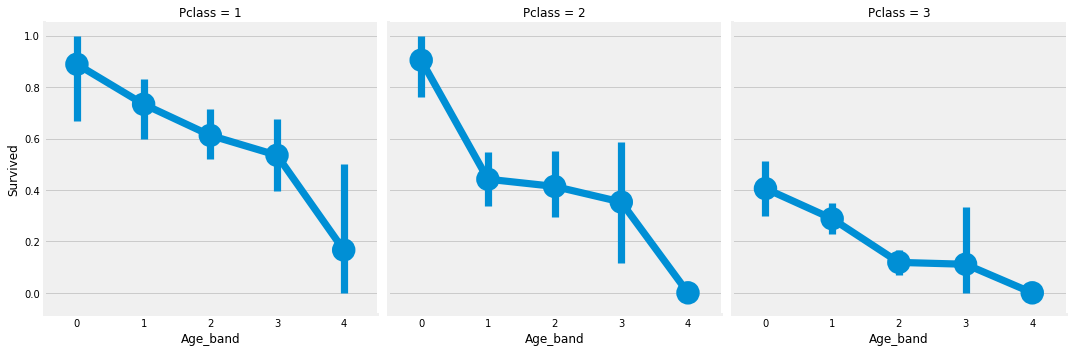

In [36]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')

### Parch (Parent Child) and SibSp (Siblings Spouse)

In [37]:
# Parch Feature
pd.crosstab(data['Parch'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [38]:
# Parch Feature
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


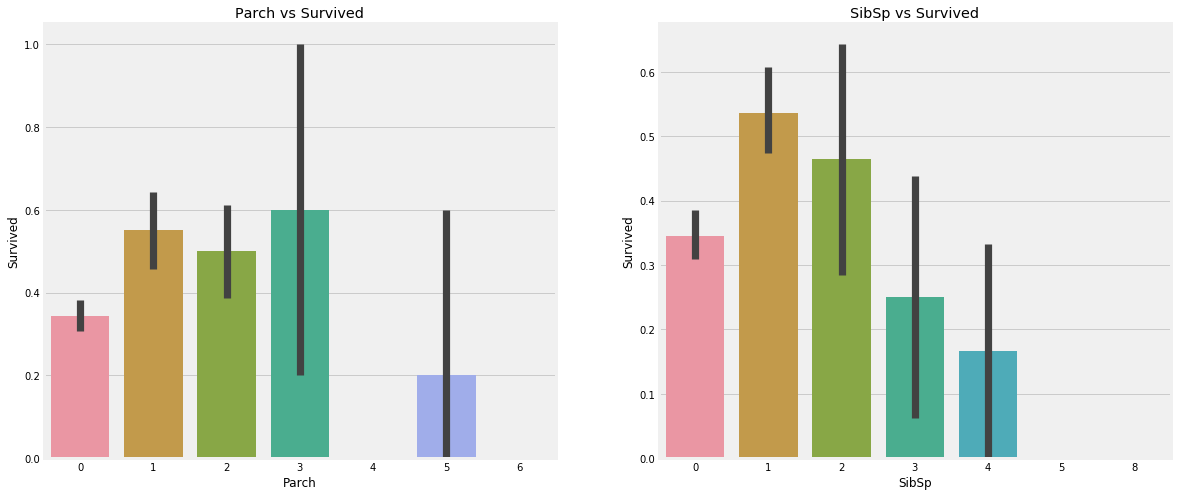

In [39]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.barplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

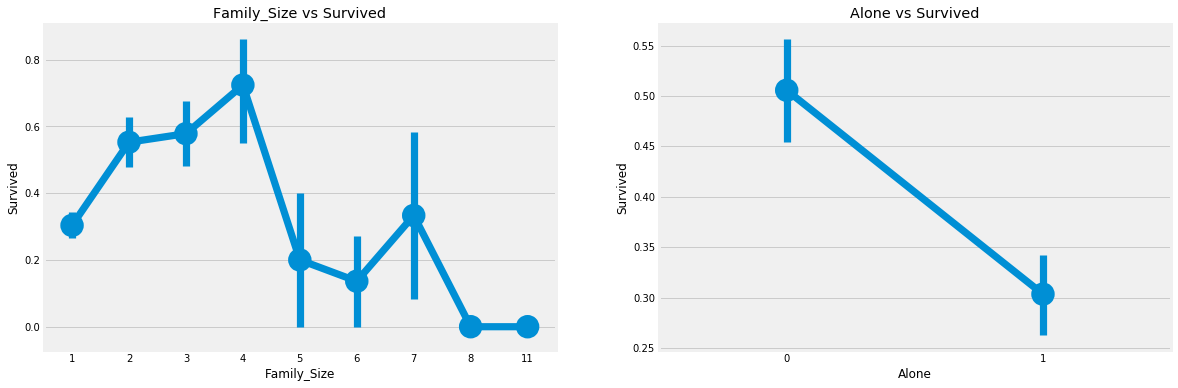

In [40]:
# We have Parent chile & Sibling information from which we can derive two new feature saying isAlone and FamilySize

# Family_Size
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']+1
data['Alone']=1
data.loc[data.Family_Size>1,'Alone']=0

data_val['Family_Size']=0
data_val['Family_Size']=data_val['Parch']+data_val['SibSp']+1
data_val['Alone']=1
data_val.loc[data_val.Family_Size>1,'Alone']=0


f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

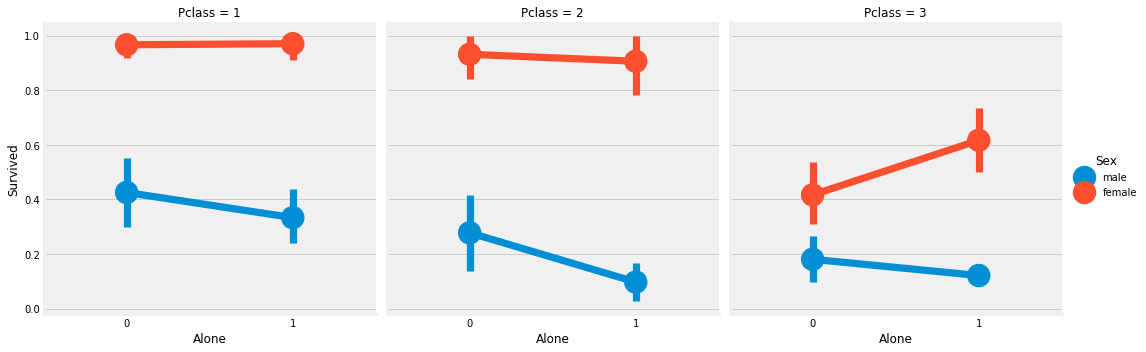

In [41]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### Fare

In [42]:
# Fare Variable 
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


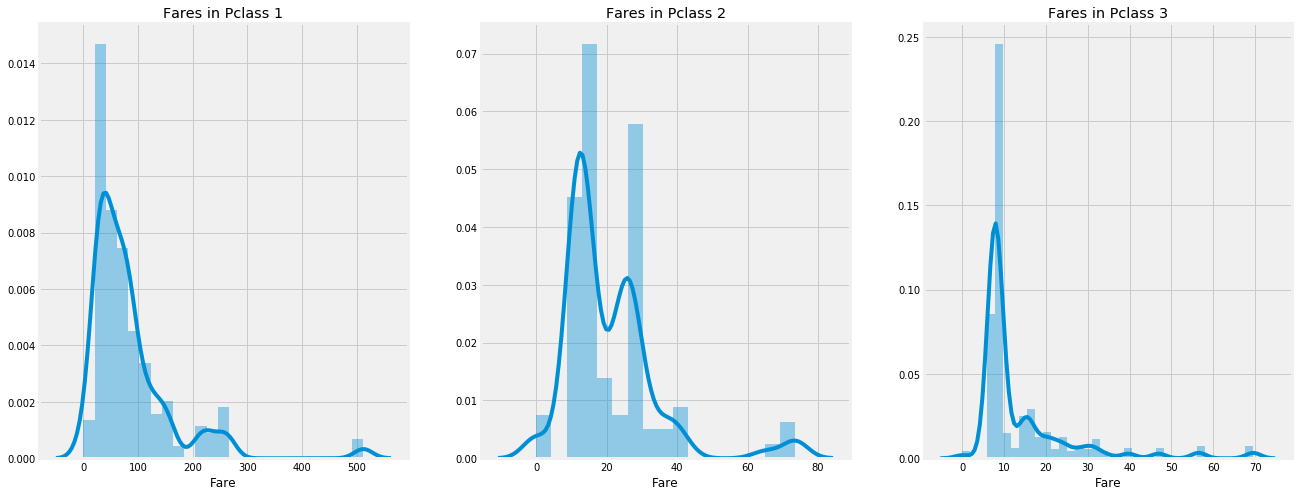

In [43]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

In [44]:
# Lets feature engineer Fare
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


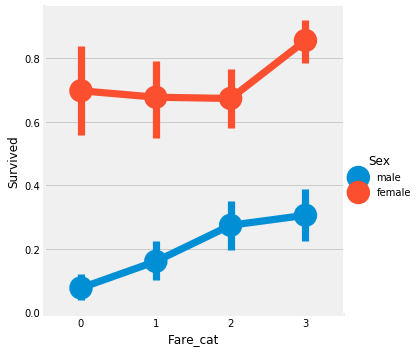

In [45]:
# Create new feature for fare like age
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.54),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

data_val['Fare_cat'] = 0
data_val.loc[data_val['Fare']<=7.91,'Fare_cat']=0
data_val.loc[(data_val['Fare']>7.91) & (data_val['Fare']<=14.54),'Fare_cat']=1
data_val.loc[(data_val['Fare']>14.454)&(data_val['Fare']<=31),'Fare_cat']=2
data_val.loc[(data_val['Fare']>31)&(data_val['Fare']<=513),'Fare_cat']=3


sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')

plt.show()

### Embarked

In [46]:
data['Embarked'].fillna('S',inplace=True)

data_val['Embarked'].fillna('S',inplace=True)

data.Embarked.isnull().any()# Finally No NaN values

False

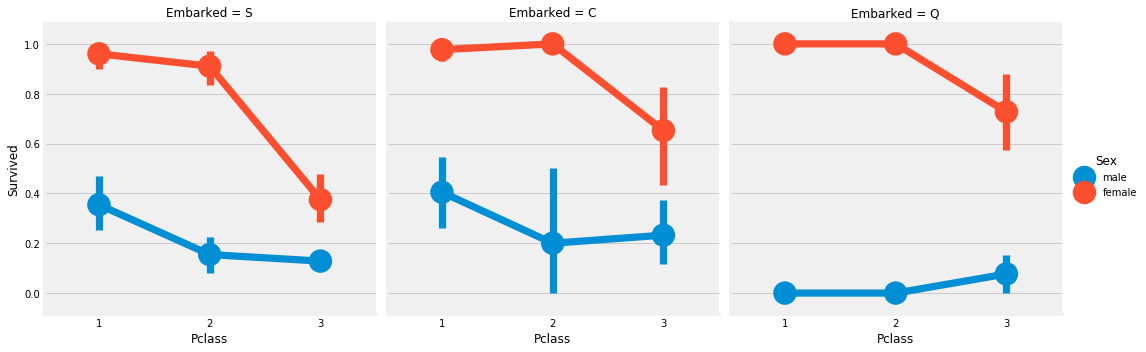

In [47]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### Lets selected only required features

In [48]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr,1,2,0,"(-0.001, 7.91]",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,2,2,0,"(31.0, 512.329]",3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss,1,1,1,"(7.91, 14.454]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs,2,2,0,"(31.0, 512.329]",3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr,2,1,1,"(7.91, 14.454]",1


In [50]:
# Not picking Age, Fare -> since we have categorised
data = data[['Survived','Pclass','Sex','Age_band','SibSp','Parch','Family_Size','Alone','Fare_cat','Embarked','Initial']]
data_val = data_val[['Pclass','Sex','Age_band','SibSp','Parch','Family_Size','Alone','Fare_cat','Embarked','Initial']]

In [51]:
data.head()

,Survived,Pclass,Sex,Age_band,SibSp,Parch,Family_Size,Alone,Fare_cat,Embarked,Initial
0,0,3,male,1,1,0,2,0,0,S,Mr
1,1,1,female,2,1,0,2,0,3,C,Mrs
2,1,3,female,1,0,0,1,1,1,S,Miss
3,1,1,female,2,1,0,2,0,3,S,Mrs
4,0,3,male,2,0,0,1,1,1,S,Mr


In [52]:
data_val.head()

,Pclass,Sex,Age_band,SibSp,Parch,Family_Size,Alone,Fare_cat,Embarked,Initial
0,3,male,2,0,0,1,1,0,Q,Mr
1,3,female,2,1,0,2,0,0,S,Mrs
2,2,male,3,0,0,1,1,1,Q,Mr
3,3,male,1,0,0,1,1,1,S,Mr
4,3,female,1,1,1,3,0,1,S,Mrs


### Lets save this to file called cleaned

In [53]:
data.to_csv("Titanic_cleaned_data.csv", encoding='utf-8')
data.to_csv("Titanic_cleaned_data_validation.csv", encoding='utf-8')

## Thanks ...Happy Learning